In [1]:
# ------------------------------------
# 1. Core Data Manipulation & Visualization
# ------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ------------------------------------
# 2. Text Processing (NLP)
# ------------------------------------
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# ------------------------------------
# 3. Feature Engineering & Preprocessing
# ------------------------------------
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# ------------------------------------
# 4. Machine Learning Models
# ------------------------------------
from sklearn.naive_bayes import BernoulliNB

# ------------------------------------
# 5. Model Evaluation Metrics
# ------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score

from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3025,ham,I finished my lunch already. U wake up already?,NaN,NaN,NaN
740,ham,Yes i will be there. Glad you made it.,NaN,NaN,NaN
537,ham,Or maybe my fat fingers just press all these b...,NaN,NaN,NaN
3553,ham,am up to my eyes in philosophy,NaN,NaN,NaN
1817,ham,Well i will watch shrek in 3D!!B),NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

df.sample(5)

,label,message
2857,ham,In life when you face choices Just toss a coin...
1363,ham,"Yetunde, i'm sorry but moji and i seem too bus..."
853,ham,\AH POOR BABY!HOPE URFEELING BETTERSN LUV! PRO...
3687,ham,I'll meet you in the lobby
4798,ham,I dont know why she.s not getting your messages


In [4]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

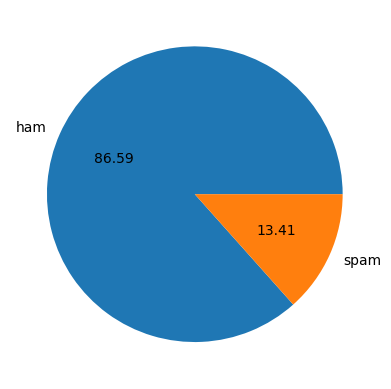

In [5]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()



In [6]:
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])
df.sample(5)

,label,message
2539,0,Hmmm:)how many players selected?
1738,0,K go and sleep well. Take rest:-).
2015,0,Just re read it and I have no shame but tell m...
823,1,25p 4 alfie Moon's Children in need song on ur...
2531,0,What's happening with you. Have you gotten a j...


In [7]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.shape

(5169, 2)

Spam doesn't just differ from ham by a single word;
it's the frequency of certain words,
the structure of the email, the presence of specific symbols or links, etc.

So We will need to create additional columns to avoid the problem of under-fitting
Cuz we just have 2 columns

So we will add columns such as number of tokens, Characters Count,...

In [10]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
df['tokens_count'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['char_count'] = df['message'].apply(len)
df['caps_ratio'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()) / (len(x) + 1e-6))
df['num_dollar_sign'] = df['message'].apply(lambda x: x.count('$'))
df['has_url'] = df['message'].apply(lambda x: 1 if re.search(r'http[s]?://', x) else 0)

In [12]:
df.sample(5)

,label,message,tokens_count,char_count,caps_ratio,num_dollar_sign,has_url
3999,1,This is the 2nd time we have tried to contact ...,34,159,0.050314,0,0
2895,1,pdate_Now - Double mins and 1000 txts on Orang...,29,163,0.116564,0,0
3005,0,Also hi wesley how've you been,7,30,0.033333,0,0
493,0,What class of &lt;#&gt; reunion?,12,34,0.029412,0,0
5387,0,I will be gentle baby! Soon you will be taking...,26,101,0.019802,0,0


In [13]:
df.groupby('label').describe()

tokens_count                                                      \
             count       mean        std  min   25%   50%   75%    max   
label                                                                    
0           4516.0  17.123782  13.493970  1.0   8.0  13.0  22.0  220.0   
1            653.0  27.667688   7.008418  2.0  25.0  29.0  32.0   46.0   

      char_count              ... num_dollar_sign      has_url            \
           count        mean  ...             75%  max   count      mean   
label                         ...                                          
0         4516.0   70.459256  ...             0.0  3.0  4516.0  0.000000   
1          653.0  137.891271  ...             0.0  1.0   653.0  0.027565   

                                          
            std  min  25%  50%  75%  max  
label                                     
0      0.000000  0.0  0.0  0.0  0.0  0.0  
1      0.163849  0.0  0.0  0.0  0.0  1.0  

[2 rows x 40 columns]

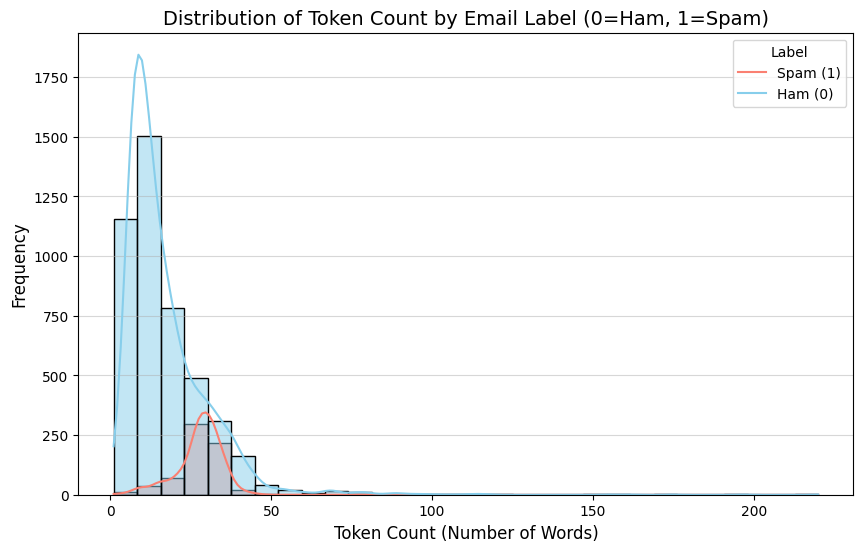

In [14]:

# --- 1. Histogram for Tokens Count per Label ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tokens_count', hue='label', kde=True, bins=30, palette={0: 'skyblue', 1: 'salmon'})
plt.title('Distribution of Token Count by Email Label (0=Ham, 1=Spam)', fontsize=14)
plt.xlabel('Token Count (Number of Words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Label', labels=['Spam (1)', 'Ham (0)'])
plt.grid(axis='y', alpha=0.5)


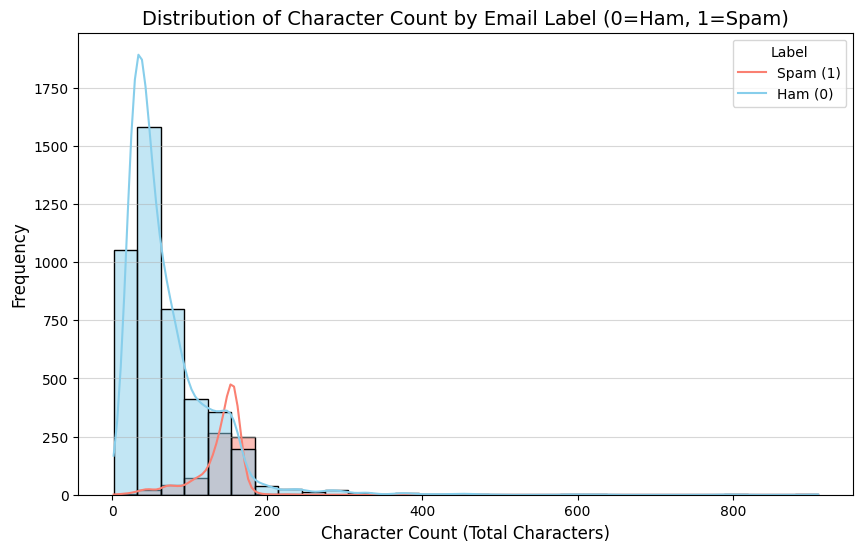

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='char_count', hue='label', kde=True, bins=30, palette={0: 'skyblue', 1: 'salmon'})
plt.title('Distribution of Character Count by Email Label (0=Ham, 1=Spam)', fontsize=14)
plt.xlabel('Character Count (Total Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Label', labels=['Spam (1)', 'Ham (0)'])
plt.grid(axis='y', alpha=0.5)

In [16]:
def clean_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # tokenization 
    tokens = nltk.word_tokenize(text)
    #Remove stopwords (requires NLTK)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Example usage:
df['clean_message'] = df['message'].apply(clean_text)

In [17]:
df.drop('message', axis=1, inplace=True)
df.sample(5)

,label,tokens_count,char_count,caps_ratio,num_dollar_sign,has_url,clean_message
1027,0,11,43,0.046512,0,0,around still asleep v
4094,0,18,85,0.023529,0,0,aint answerin phone actually pretty reasonable...
2791,0,34,124,0.024194,0,0,û r stayin extra week back next wed rugby wee...
2363,1,35,162,0.135802,0,0,fantasy football back tv go sky gamestar sky a...
3073,0,9,35,0.057143,0,0,know didt msg recently


In [18]:
stemmer = SnowballStemmer("english")

In [19]:
df['clean_message'] = df['clean_message'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [41]:
df.sample(5)

,label,tokens_count,char_count,caps_ratio,num_dollar_sign,has_url,clean_message
2313,0,7,23,0.043478,0,0,guy
5491,0,17,65,0.030769,0,0,u studi sch go home anyway ill b go sch later
876,0,10,44,0.045455,0,0,castor need see someth
4898,0,12,47,0.042553,0,0,haha first person gon na ask
3379,0,6,33,0.060606,0,0,finish miss plenti


In [21]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

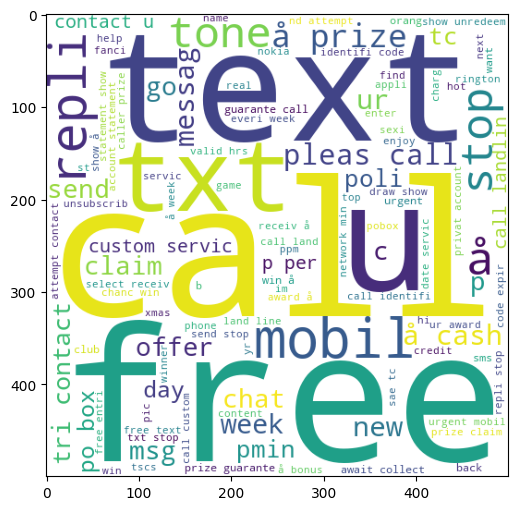

In [22]:
spam_wc = wc.generate(df[df['label'] == 1]['clean_message'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

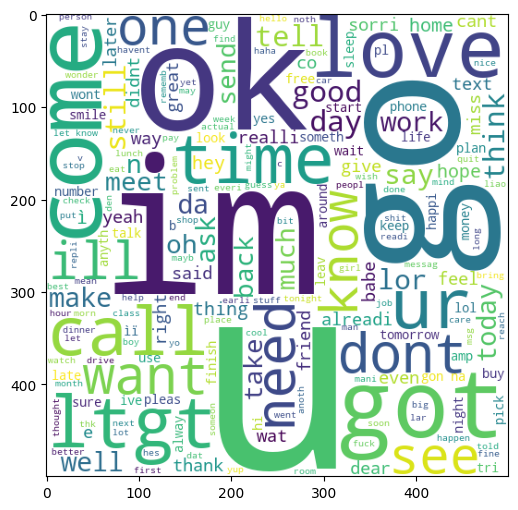

In [23]:
spam_wc = wc.generate(df[df['label'] == 0]['clean_message'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [42]:
# tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

In [43]:
X = tfidf_vectorizer.fit_transform(df['clean_message']).toarray()

In [44]:
X.shape

(5169, 2000)

In [45]:
# appending the num_character col to X
manual_features = df[['char_count', 'tokens_count','caps_ratio','num_dollar_sign','has_url']]

# Convert manual features to sparse matrix (matching the sparse X_text format)
manual_features_sparse = csr_matrix(manual_features.values)

X_final = hstack([X, manual_features_sparse])

In [28]:
X_final.shape

(5169, 2005)

In [46]:
y = df['label'].values

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=42, stratify=y)

In [48]:
smote = SMOTE(sampling_strategy='minority',random_state=42)
X, y = smote.fit_resample(X_train, y_train)

In [49]:
print("SMOTE Training Set Distribution: %s" % Counter(y))

SMOTE Training Set Distribution: Counter({np.int64(0): 3613, np.int64(1): 3613})


In [51]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X.toarray())

In [52]:
bnb = BernoulliNB()

In [53]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

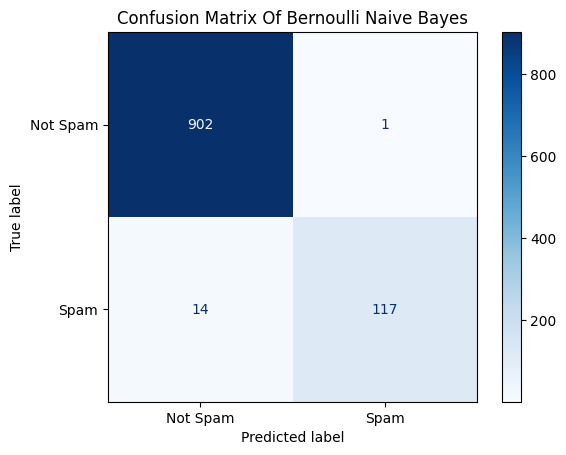

In [54]:
cm = confusion_matrix(y_test, y_pred)
# Initialize the display using the calculated matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Not Spam', 'Spam']
)

# Plot the matrix
disp.plot(cmap=plt.cm.Blues) 

# Add a title and show the plot
plt.title('Confusion Matrix Of Bernoulli Naive Bayes')
plt.show()

In [55]:
accuracy, recall = accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

print(f"\nBNB Test Accuracy: {accuracy:.4f}")
print(f"BNB Test Recall: {recall:.4f}")

print("BNB Classification Report:")
print(classification_report(y_pred,y_test))


BNB Test Accuracy: 0.9855
BNB Test Recall: 0.8931
BNB Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       916
           1       0.89      0.99      0.94       118

    accuracy                           0.99      1034
   macro avg       0.95      0.99      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [56]:
def preprocess_for_predict(new_messages, tfidf_vectorizer, scaler):
    """
    Applies the exact same feature engineering and scaling steps
    to new, unseen messages for model prediction.

    Args:
        new_messages (list or pd.Series): A list or Series of raw email strings.
        tfidf_vectorizer: The TfidfVectorizer object fitted on the training data.
        scaler: The MinMaxScaler object fitted on the training data.

    Returns:
        numpy.ndarray: The final, scaled feature array ready for model.predict().
    """
    
    if isinstance(new_messages, str):
        # Handle single string input by wrapping it in a list/Series
        new_messages = pd.Series([new_messages])

    # Create a temporary DataFrame for feature calculation
    temp_df = pd.DataFrame({'message': new_messages})
    
    # 1. Feature Engineering (Must be calculated on the raw message)
    temp_df['tokens_count'] = temp_df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
    temp_df['char_count'] = temp_df['message'].apply(len)
    temp_df['caps_ratio'] = temp_df['message'].apply(lambda x: sum(1 for c in x if c.isupper()) / (len(x) + 1e-6))
    temp_df['num_dollar_sign'] = temp_df['message'].apply(lambda x: x.count('$'))
    temp_df['has_url'] = temp_df['message'].apply(lambda x: 1 if re.search(r'http[s]?://', x) else 0)

    # 2. Text Cleaning and Stemming
    temp_df['clean_message'] = temp_df['message'].apply(clean_text)
    stemmer = SnowballStemmer("english")
    temp_df['clean_message'] = temp_df['clean_message'].apply(
        lambda x: ' '.join([stemmer.stem(word) for word in x.split()])
    )

    # 3. Text Vectorization
    X_text = tfidf_vectorizer.transform(temp_df['clean_message'])
    
    # 4. Feature Combination
    manual_features = temp_df[['char_count', 'tokens_count','caps_ratio','num_dollar_sign','has_url']]
    manual_features_sparse = csr_matrix(manual_features.values)
    
    # Combine sparse text features and sparse manual features
    X_combined = hstack([X_text, manual_features_sparse])
    
    # 5. Scaling 
    X_final_scaled = scaler.transform(X_combined.toarray())
    
    return X_final_scaled

In [57]:
def predict(model,emails):
    X_predict = preprocess_for_predict(emails, tfidf_vectorizer, scaler)
    return model.predict(X_predict)


new_emails = [
    # --- Example Ham (Non-Spam) Messages ---
    "Regarding the team meeting scheduled for tomorrow, please review the attached document before 10 AM. Agenda is collaboration status.",
    "Can you confirm receipt of the invoice #90123? We need payment processed by the end of the week. Thanks!",
    "Just checking in on the project deadline. Are we still on track for the July 15th release? Let me know if you need anything.",
    
    # --- Example Spam Messages ---
    "URGENT PRIZE NOTIFICATION!!! Click here NOW to claim your FREE MILLION DOLLARS! Limited time offer, ACT FAST: http://tinyurl.com/scam",
    "Dear valued member, YOUR ACCOUNT HAS BEEN SUSPENDED. Verify your details immediately to avoid deactivation via this link: http://phishing.net/login",
    "VIAGRA 80% OFF! Do not miss this CHANCE to get the best deal. Use code FREEBIE at checkout. GUARANTEED!!!",
    
    # --- Mixed/Tricky Message ---
    "Hello! I found a great deal on a new watch at Amazon. It's 50% off if you use this coupon code. I'll send the link separately." 
]
print(predict(bnb,new_emails))

[0 0 0 1 1 1 0]


# Implementing ANN

In [58]:
input_dim = X_train.shape[1]
input_dim

2005

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [99]:
model = Sequential([
    Dense(128, input_dim=input_dim, activation='relu', name='Hidden_Layer_1'),
    Dropout(0.3),
    
    Dense(64, activation='relu', name='Hidden_Layer_2'),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid', name='Output_Layer')
])

In [100]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])


model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 128)            │       256,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,089 (1.01 MB)

 Trainable params: 265,089 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# 4. Train the Model
history = model.fit(
    X_train, 
    y_train, 
    epochs=20,         
    batch_size=32,      
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9804 - loss: 0.0615 - recall: 0.9059 - val_accuracy: 0.9903 - val_loss: 0.0403 - val_recall: 0.9091
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9868 - loss: 0.0429 - recall: 0.9351 - val_accuracy: 0.9928 - val_loss: 0.0336 - val_recall: 0.9773
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9866 - loss: 0.0429 - recall: 0.9351 - val_accuracy: 0.9928 - val_loss: 0.0311 - val_recall: 0.9318
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9898 - loss: 0.0343 - recall: 0.9414 - val_accuracy: 0.9928 - val_loss: 0.0330 - val_recall: 0.9318
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9855 - loss: 0.0437 - recall: 0.9331 - val_accuracy: 0.9879 - val_loss: 0.0391 - val_recall: 0.8864
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9898 - loss: 0.0344 - recall: 0.9477 - val_accuracy: 0.9879 - val_loss: 0.0334 - val_recall: 0.9773
Epoc

In [105]:
# 5. Evaluate the Model on Test Data
loss, accuracy, val_recall = model.evaluate(X_test, y_test, verbose=0)

print(f"\nANN Test Accuracy: {accuracy:.4f}")
print(f"ANN Test Recall: {recall:.4f}")

# 6. Final Predictions and Metrics
# ANN outputs probabilities (0 to 1). We need to set the threshold.
# Since recall is crucial, you can use the standard 0.5
y_pred_proba = model.predict(X_test)
THRESHOLD = 0.5 
y_pred = (y_pred_proba > THRESHOLD).astype(int)

print("\n--- Classification Report (ANN) ---")
print(classification_report(y_test, y_pred))


ANN Test Accuracy: 0.9807
ANN Test Recall: 0.8931
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

--- Classification Report (ANN) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.91      0.94      0.92       131

    accuracy                           0.98      1034
   macro avg       0.95      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



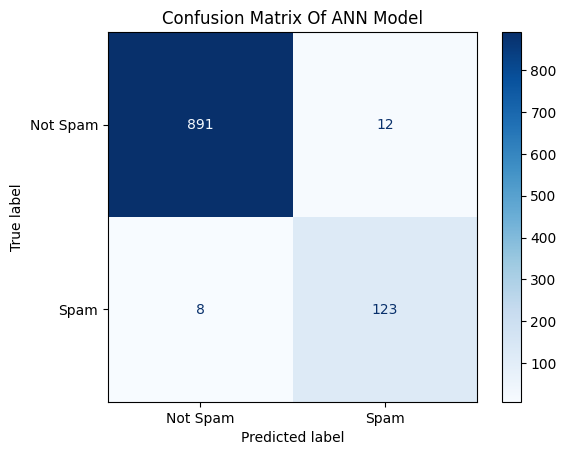

In [106]:
cm = confusion_matrix(y_test, y_pred)
# Initialize the display using the calculated matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Not Spam', 'Spam']
)

# Plot the matrix
disp.plot(cmap=plt.cm.Blues) 

# Add a title and show the plot
plt.title('Confusion Matrix Of ANN Model')
plt.show()

In [ ]:
new_emails = [
    # --- Example Ham (Non-Spam) Messages ---
    "Regarding the team meeting scheduled for tomorrow, please review the attached document before 10 AM. Agenda is collaboration status.",
    "Can you confirm receipt of the invoice #90123? We need payment processed by the end of the week. Thanks!",
    "Just checking in on the project deadline. Are we still on track for the July 15th release? Let me know if you need anything.",
    
    # --- Example Spam Messages ---
    "URGENT PRIZE NOTIFICATION!!! Click here NOW to claim your FREE MILLION DOLLARS! Limited time offer, ACT FAST: http://tinyurl.com/scam",
    "Dear valued member, YOUR ACCOUNT HAS BEEN SUSPENDED. Verify your details immediately to avoid deactivation via this link: http://phishing.net/login",
    "VIAGRA 80% OFF! Do not miss this CHANCE to get the best deal. Use code FREEBIE at checkout. GUARANTEED!!!",
    
    # --- Mixed/Tricky Message ---
    "Hello! I found a great deal on a new watch at Amazon. It's 50% off if you use this coupon code. I'll send the link separately." 
]
print(predict(bnb,new_emails))

[0 0 0 1 1 1 0]
